# Анализ продаж интернет-магазина компьютерных игр
## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр,   
оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Вам нужно выявить определяющие успешность игры закономерности.  
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года.  
Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.  
Нужно отработать принцип работы с данными.  
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

## Общая информация

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

Описание столбцов:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `A_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).<br>
   Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
games = pd.read_csv('games.csv')
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***
### Вывод

* Необходимо привезти названия столбцов к одному виду.
* Столбец `Year_of_Release` необходимо привезти к типу `integer`.
* Столбец `Critic_Score` необходимо привезти к типу `integer`, содержит небольшое количество нерелевантных данных.
* Есть опечатки в названиях столбца `Name`.
* Есть смещение части строк таблицы вправо.
* В столбце `User_Score` есть строки `tbd`, необходимо выяснить, что это значит.<br><br>
***

## Подготовка данных

### Замена названий столбцов (приведение к нижнему регистру)

In [5]:
games.columns = map(str.lower, games.columns)
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Обработка пропусков

#### Столбец `name`

Пропусков было немного, видимо, опечатка.

In [6]:
games['name'] = games['name'].fillna('unknown')
games['name'].isna().sum()

0

#### Столбец `year_of_release`

Пропусков довольно много, видимо, техническая ошибка.  
Дата релиза должна быть у всех игр, можно вручную проверять каждую игру на каждой платформе, но это крайне затратно по времени.  

In [7]:
games = games[games['year_of_release'].notna()]
games['year_of_release'].isna().sum()

0

#### Столбец `genre`

Пропусков было немного, видимо, опечатка.

In [8]:
games['genre'] = games['genre'].fillna('unknown')
games['genre'].isna().sum()

0

#### Столбец `critic_score`

Пропусков много, вполне вероятно, что не для всех игр рассчитывался `critic_score`.  
Заменить на ноль, как выше, нельзя, так как могут встречаться такие оценки.  

In [9]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'].isna().sum()

0

#### Столбец `user_score`

Пропусков много, вполне вероятно, что не для всех игр рассчитывался `user_score`.  
Заменить на ноль, как выше, нельзя, так как могут встречаться такие оценки.  

In [10]:
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'].isna().sum()

0

#### Столбец `rating`

Пропусков много, вполне вероятно, что не для всех игр рассчитывался `rating`.<br>

In [12]:
games.loc[games['rating'] == "K-A", 'rating'] = 'E'
games['rating'] = games['rating'].fillna('unknown')
games['rating'].isna().sum()

0

### Преобразование данных в нужные типы

#### Столбец `year_of_release`

In [13]:
games['year_of_release'] = games['year_of_release'].astype('int')

#### Столбец `user_score`

Сначала необходимо заменить строки со значениями `tbd`.  
Судя по всему, `tbd` — "to be determined", применяется для игр, у которых ещё не установлен `user_score`.  

In [14]:
games.loc[games['user_score'] == "tbd", 'user_score'] = -1
games.query('user_score == "tbd"')['platform'].count()

0

In [15]:
games['user_score'] = games['user_score'].astype('float')

In [16]:
games.tail(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.0,0.01,0.0,-1.0,-1.0,unknown


In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Расчёт суммарных продаж во всех регионах

In [18]:
games['world_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


### Обработка опечаток

При построении графика распределения самых популярных платформ  
выявилась опечатка по одной из игр, которая ведёт к неверному построению графика.  
`DS` — консоль Nintendo DS.  
Консоль выпускалась с 2004 года.  
Игра не могла выйти в 1985 году, уберу год издания.  

In [19]:
games.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


In [20]:
games.loc[games['name'] == "Strongest Tokyo University Shogi DS", 'year_of_release'] = 0

При подготовке информации о распределении игр по жанрам выявилась опечатка:  
Игра `FIFA Soccer 13` имеет жанр `Action`, должен быть `Sports`.  

In [21]:
games.loc[games['name'] == "FIFA Soccer 13", 'genre'] = 'Sports'

### Поиск дубликатов

In [22]:
games.duplicated()
games.duplicated().sum()

0

***
### Вывод

* Все данные приведены к нужному типу.
* Рассчитаны суммарные продажи во всех регионах, данные занесены в отдельный столбец `world_sales`.<br><br>
***

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

In [23]:
filt_games = games.query('year_of_release > 0')
pivot_years = filt_games.pivot_table(index='year_of_release', values='platform', aggfunc='count')

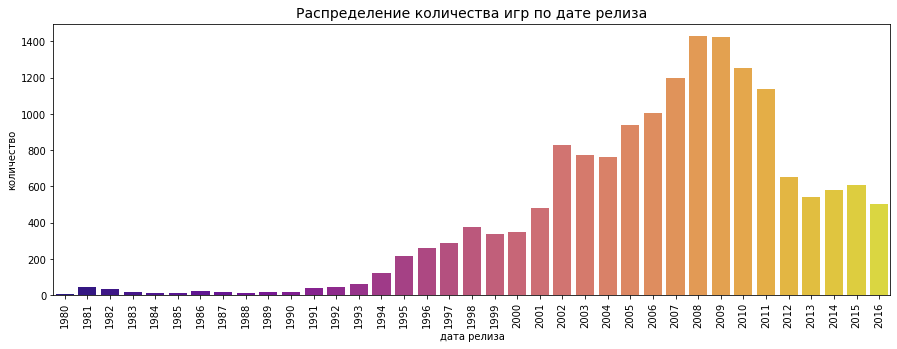

In [24]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(x=pivot_years.index, y='platform', data=pivot_years, palette='plasma')
fig.set_title('Распределение количества игр по дате релиза', fontsize=14)
fig.set_xlabel('дата релиза')
fig.set_ylabel('количество')
plt.setp(fig.get_xticklabels(),rotation=90)
plt.show()

Данными до 1995 года можно пренебречь для планирования будущих продаж.  
Начиная с 2010 года продажи снизились практически вдвое.  

### Как менялись продажи по платформам. 

#### Платформы с наибольшими суммарными продажами и распределение по годам.

In [25]:
pivot_platform = filt_games.pivot_table(index='platform', values='world_sales', aggfunc='sum')
pivot_platform.sort_values(by='world_sales', ascending=False).head(10)

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [26]:
top10 = pivot_platform.sort_values(by='world_sales', ascending=False).head(10).reset_index(drop=False)
top10_list = list(top10['platform'])
top10_platform = filt_games.query('platform in @top10_list')
pivot_top10_platform = top10_platform.query('year_of_release > 0').pivot_table(
    index='year_of_release', columns='platform', values='world_sales', aggfunc='sum'
)

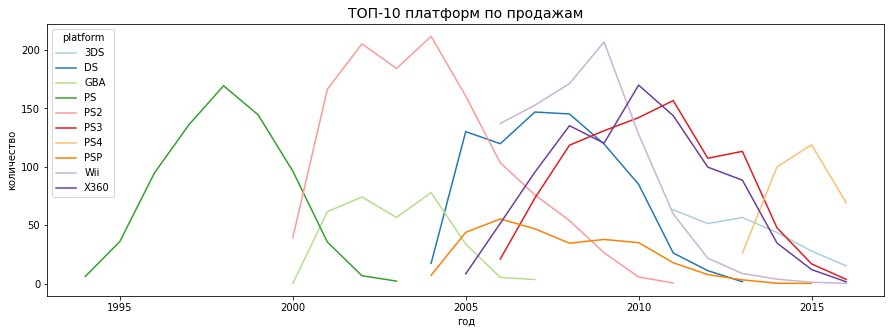

In [27]:
plt.figure(figsize=(15, 5))
fig = sns.lineplot(data=pivot_top10_platform, palette='Paired', dashes=False)
fig.set_title('ТОП-10 платформ по продажам', fontsize=14)
fig.set_xlabel('год')
fig.set_ylabel('количество')
plt.show()

#### Характерный срок, за который появляются новые и исчезают старые платформы.

In [28]:
pivot_platform = filt_games.pivot_table(
    index='year_of_release', columns='platform', values='world_sales', aggfunc='sum'
)

In [29]:
def seek_platform_lifespan(column):
    valid_column = column[column.notna()]
    first_year = valid_column.index.min()
    last_year = valid_column.index.max()
    return last_year - first_year + 1

In [30]:
platform_lifespan = pivot_platform.apply(seek_platform_lifespan, axis=0)
mean_platform_lifespan = platform_lifespan.mean()
print('Среднее время «жизни» платформы в годах: {:.0f}'.format(mean_platform_lifespan))

Среднее время «жизни» платформы в годах: 8


### Данные за период 2013–2016

In [31]:
current_games = games.query('year_of_release > 2012')
pivot_current_games = current_games.pivot_table(
    index='year_of_release', columns='platform', values='world_sales', aggfunc='sum'
)

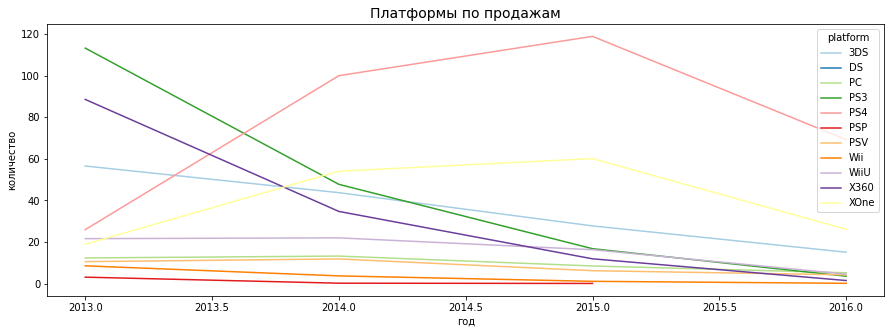

In [32]:
plt.figure(figsize=(15, 5))
fig = sns.lineplot(data=pivot_current_games, palette='Paired', dashes=False)
fig.set_title('Платформы по продажам', fontsize=14)
fig.set_xlabel('год')
fig.set_ylabel('количество')
plt.show()

### Несколько потенциально прибыльных платформ

In [33]:
current_pivot_platform = current_games.pivot_table(index='platform', values='world_sales', aggfunc='sum')
current_pivot_platform.sort_values(by='world_sales', ascending=False).head(10)

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [34]:
current_top10 = current_pivot_platform.sort_values(by='world_sales', ascending=False).head(10).reset_index(drop=False)
current_top10_list = list(current_top10['platform'])
current_top10_platform = current_games.query('platform in @current_top10_list')
current_pivot_top10_platform = current_top10_platform.pivot_table(
    index='year_of_release', columns='platform', values='world_sales', aggfunc='sum'
)

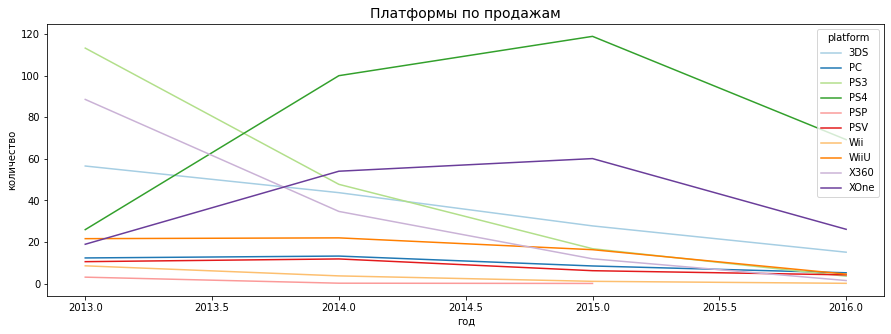

In [35]:
plt.figure(figsize=(15, 5))
fig = sns.lineplot(data=current_pivot_top10_platform, palette='Paired', dashes=False)
fig.set_title('Платформы по продажам', fontsize=14)
fig.set_xlabel('год')
fig.set_ylabel('количество')
plt.show()

Ожидаемо, самые прибыльные платформы — консоли последнего поколения на время исследования: `PS4` и `XOne`.  
Их рост начался с 2013 года, в то время, когда продажи остальных платформ резко снижаются с 2009 года.  
«Жизненный цикл» наиболее успешных платформ `Wii`, `PS3` и `X360` подходит к завершению.  
Исходя из вышесказанного, для прогноза рекламной компании имеет смысл взять период для исследования начиная с 2013 года.  
Продажи игр на платформах `PS4` и `XOne` уже начали снижаться, однако никакой другой платформы, чьи продажи бы росли, нет.  

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

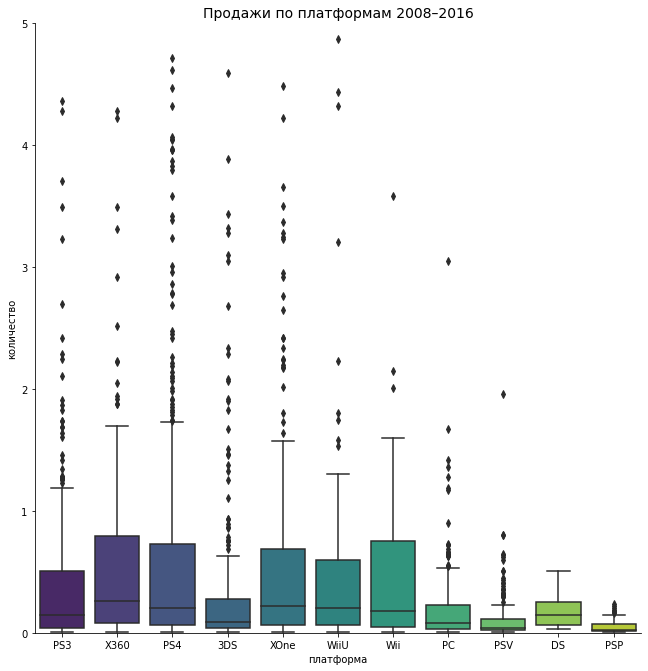

In [36]:
games_2013 = current_games.query('year_of_release > 2012')
sns.catplot(x="platform", y="world_sales", kind="box", data=games_2013, palette='viridis', height=9)
plt.title('Продажи по платформам 2008–2016', fontsize=14)
plt.xlabel('платформа')
plt.ylabel('количество')
plt.ylim(0, 5)
plt.show()

Из графика видно, что в целом продажи не превышают миллиона копий.  
Но есть выборочные проекты, которые продаются десятками миллионов копий.  

### Влияние на продажи внутри платформы `PS4`, отзывы пользователей и критиков

In [37]:
valid_score = games_2013.query('user_score != -1')
valid_score = valid_score.query('critic_score != -1')
ps4 = valid_score.query('platform == "PS4"')

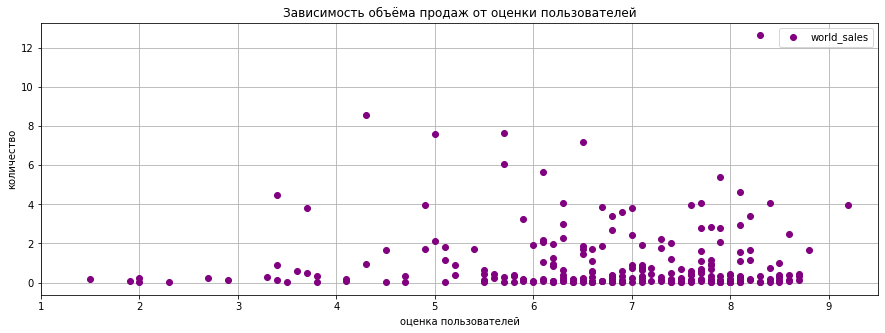

In [38]:
ps4.plot(x='user_score', y='world_sales', style='o', grid=True, figsize=(15, 5), c='purple')
plt.xlim(1, 9.5)
plt.title("Зависимость объёма продаж от оценки пользователей")
plt.xlabel("оценка пользователей")
plt.ylabel("количество")
plt.show()

In [39]:
k_u = ps4['user_score'].corr(ps4['world_sales'])
print(f'Корреляция между оценкой пользователей и мировыми продажами: {k_u:.1%}')

Корреляция между оценкой пользователей и мировыми продажами: -3.4%


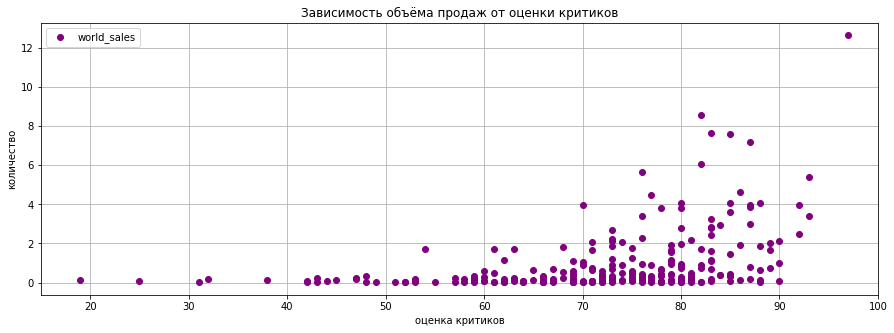

In [40]:
ps4.plot(x='critic_score', y='world_sales', style='o', grid=True, figsize=(15, 5), c='purple')
plt.xlim(15, 100)
plt.title("Зависимость объёма продаж от оценки критиков")
plt.xlabel("оценка критиков")
plt.ylabel("количество")
plt.show()

In [41]:
k_c = ps4['critic_score'].corr(ps4['world_sales'])
print(f'Корреляция между оценкой критиков и мировыми продажами: {k_c:.1%}')

Корреляция между оценкой критиков и мировыми продажами: 40.6%


In [42]:
def chaddock(ratio):
    chaddock_scale = {
        'очень слабая': (0, 0.3),
        'слабая': (0.3, 0.5),
        'средняя': (0.5, 0.7),
        'высокая': (0.7, 0.9),
        'очень высокая': (0.9, 1.0),
    }
    for k, v in chaddock_scale.items():
        if min(v) <= abs(ratio) < max(v):
            return k
    return None

In [43]:
print('• Оценки пользователей не влияют на количество продаж.')
print(f'Корреляция между оценкой пользователей и мировыми продажами:')
print(f'  {k_u:.1%} — «{chaddock(k_u)}» по качественной шкале Чеддока.')

print('• Оценки критиков влияют на количество продаж.')
print(f'Корреляция между оценкой пользователей и мировыми продажами:')
print(f'  {k_c:.1%} — «{chaddock(k_c)}» по качественной шкале Чеддока.')

• Оценки пользователей не влияют на количество продаж.
Корреляция между оценкой пользователей и мировыми продажами:
  -3.4% — «очень слабая» по качественной шкале Чеддока.
• Оценки критиков влияют на количество продаж.
Корреляция между оценкой пользователей и мировыми продажами:
  40.6% — «слабая» по качественной шкале Чеддока.


### Продажи игр на других платформах

In [44]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

for platform in current_top10_list:
    platform_data = current_games.query('platform == @platform & user_score != -1 & critic_score != -1')
    k_user = platform_data['user_score'].corr(platform_data['world_sales'])
    k_critic = platform_data['critic_score'].corr(platform_data['world_sales'])

    critic_chaddock_param = chaddock(k_critic)
    user_chaddock_param = chaddock(k_user)
    
    print(f"                 > > > {platform} < < <")
    print(f'Корреляция между оценкой критиков и мировыми продажами:')
    print(f'  {k_critic:.1%} — «{critic_chaddock_param}» по качественной шкале Чеддока.')
    print(f'Корреляция между оценкой пользователей и мировыми продажами:')
    print(f'  {k_user:.1%} — «{user_chaddock_param}» по качественной шкале Чеддока.')
    print()
    
warnings.filterwarnings("default", category=RuntimeWarning)

                 > > > PS4 < < <
Корреляция между оценкой критиков и мировыми продажами:
  40.6% — «слабая» по качественной шкале Чеддока.
Корреляция между оценкой пользователей и мировыми продажами:
  -3.4% — «очень слабая» по качественной шкале Чеддока.

                 > > > PS3 < < <
Корреляция между оценкой критиков и мировыми продажами:
  33.4% — «слабая» по качественной шкале Чеддока.
Корреляция между оценкой пользователей и мировыми продажами:
  2.3% — «очень слабая» по качественной шкале Чеддока.

                 > > > XOne < < <
Корреляция между оценкой критиков и мировыми продажами:
  41.0% — «слабая» по качественной шкале Чеддока.
Корреляция между оценкой пользователей и мировыми продажами:
  -9.4% — «очень слабая» по качественной шкале Чеддока.

                 > > > 3DS < < <
Корреляция между оценкой критиков и мировыми продажами:
  33.9% — «слабая» по качественной шкале Чеддока.
Корреляция между оценкой пользователей и мировыми продажами:
  27.3% — «очень слабая» по к

Как и в случае с `PS4` наблюдается корреляция между оценками критиков и объёмом продаж.  
По большинству основных платформ оценки пользователей не влияют на продажи.  
Ряд консолей: `3DS`, `DS`, `WiiU`, `PSP`, которые не являются популярными по всему миру, показывают влияние оценок пользователей на продажи.  

### Диаграммы рассеяния по другим платформам

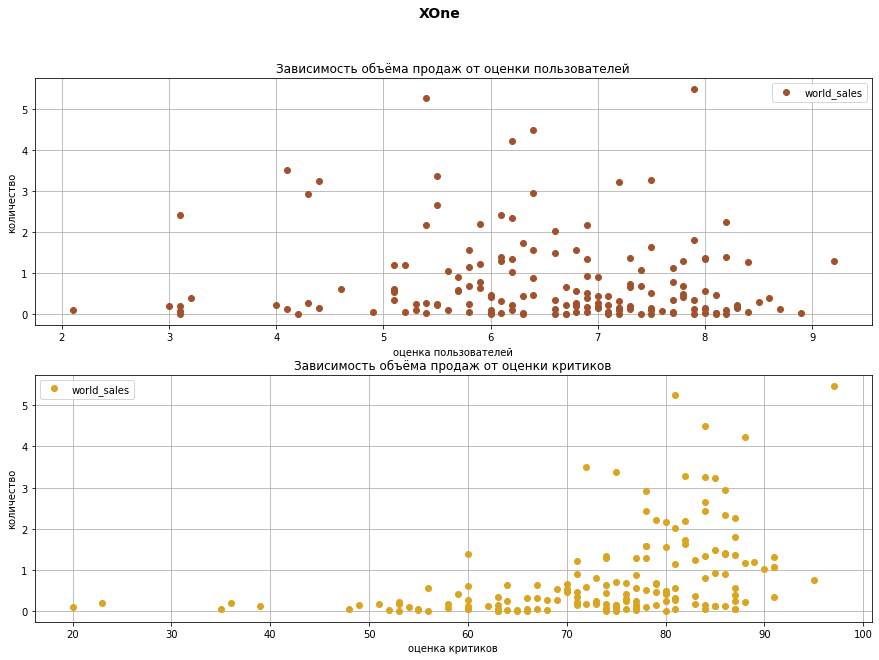

очень слабая корреляция между оценкой пользователей и мировыми продажами: -9.4%
слабая корреляция между оценкой критиков и мировыми продажами: 41.0%


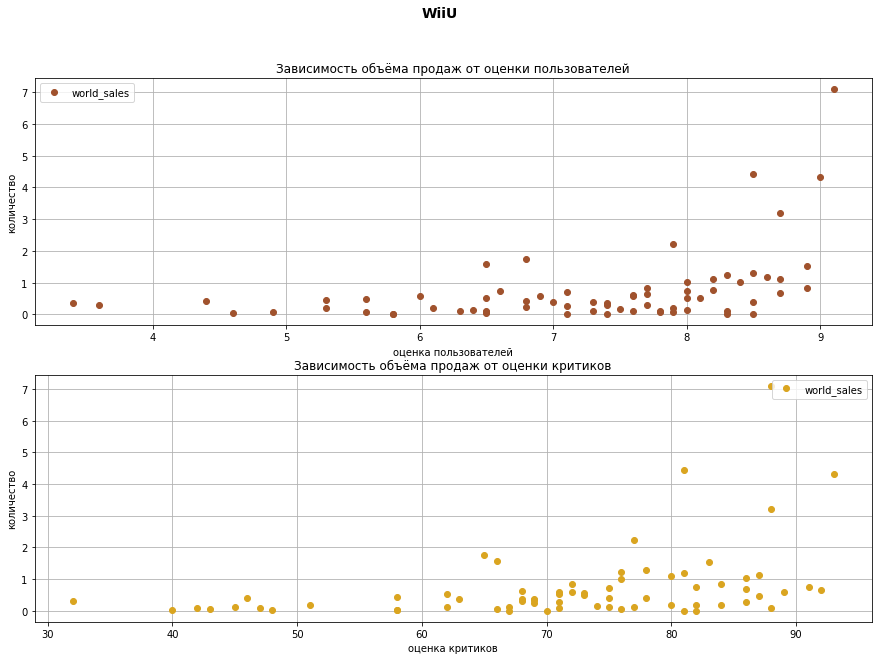

слабая корреляция между оценкой пользователей и мировыми продажами: 40.9%
слабая корреляция между оценкой критиков и мировыми продажами: 38.0%


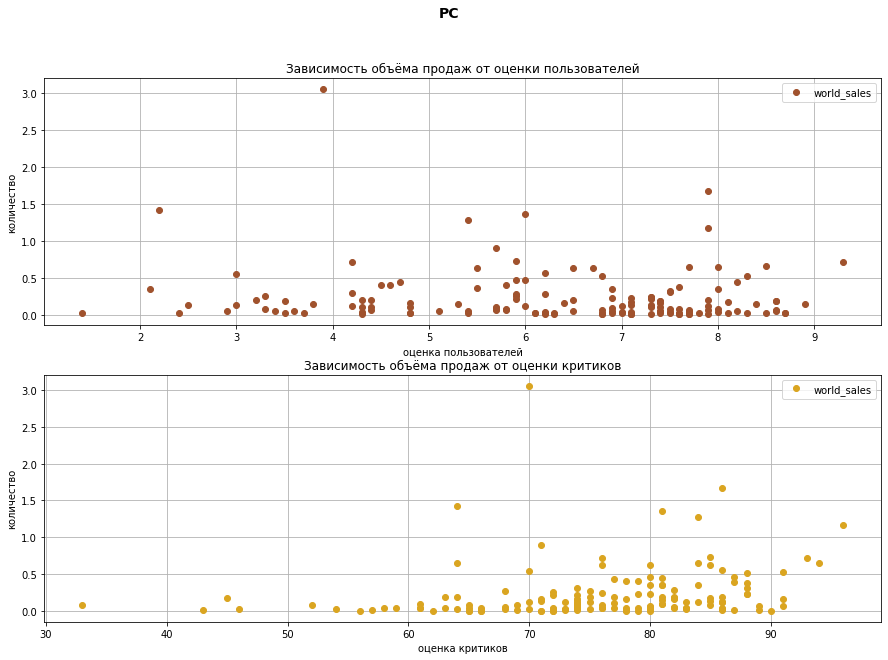

очень слабая корреляция между оценкой пользователей и мировыми продажами: -10.9%
очень слабая корреляция между оценкой критиков и мировыми продажами: 19.4%


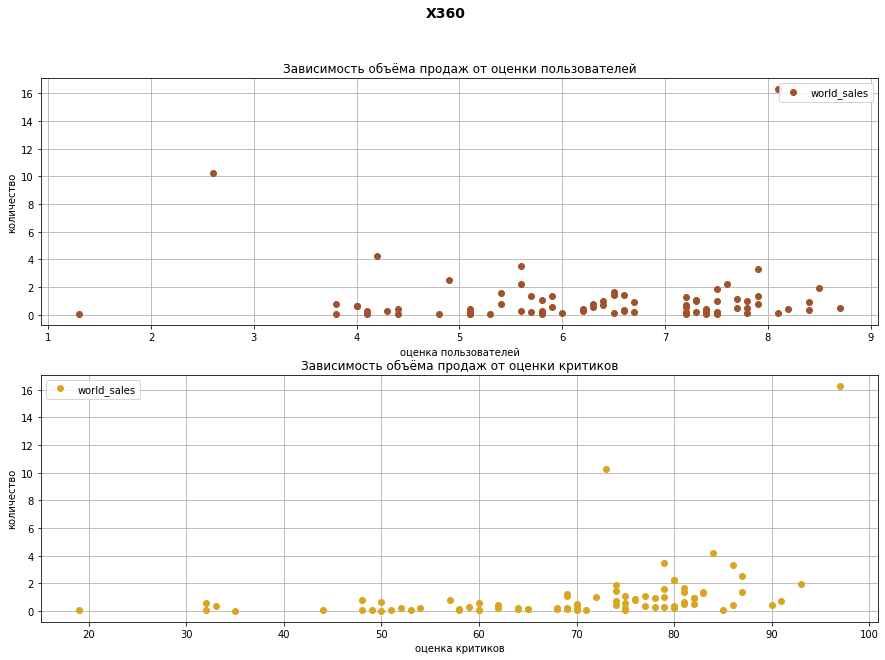

очень слабая корреляция между оценкой пользователей и мировыми продажами: -0.6%
слабая корреляция между оценкой критиков и мировыми продажами: 35.0%


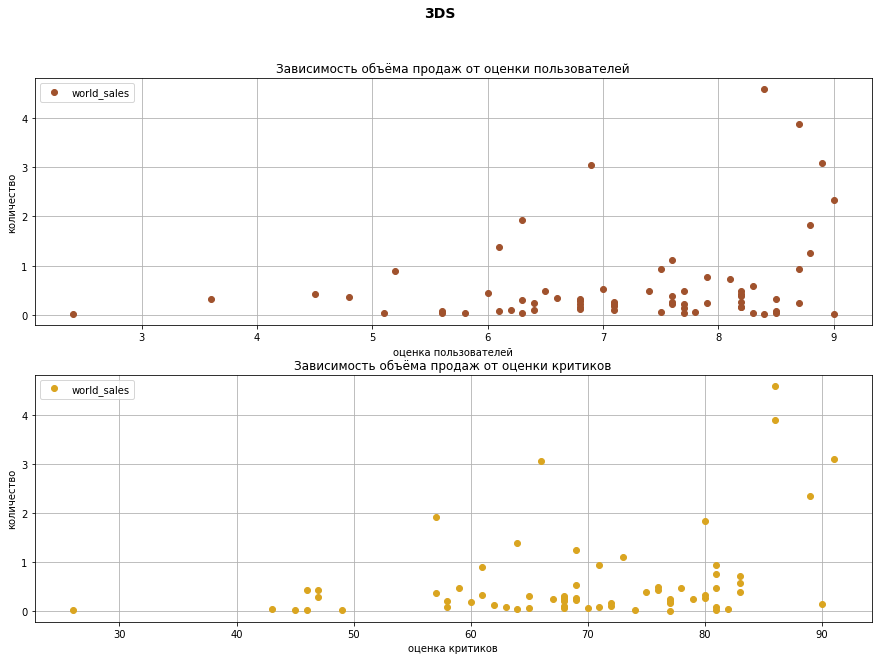

очень слабая корреляция между оценкой пользователей и мировыми продажами: 27.3%
слабая корреляция между оценкой критиков и мировыми продажами: 33.9%


In [45]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

platforms = ['XOne', 'WiiU', 'PC', 'X360', '3DS']
for platform in platforms:
    p_data = valid_score.query(f'platform == "{platform}"')
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle(platform, fontsize=14, fontweight='bold')
    
    p_data.plot(x='user_score', y='world_sales', style='o', grid=True, figsize=(15, 10), c='sienna', ax=axes[0])
    axes[0].set_title("Зависимость объёма продаж от оценки пользователей")
    axes[0].set_xlabel("оценка пользователей")
    axes[0].set_ylabel("количество")

    p_data.plot(x='critic_score', y='world_sales', style='o', grid=True, figsize=(15, 10), c='goldenrod', ax=axes[1])
    axes[1].set_title("Зависимость объёма продаж от оценки критиков")
    axes[1].set_xlabel("оценка критиков")
    axes[1].set_ylabel("количество")
    plt.show()
    
    k = p_data['user_score'].corr(p_data['world_sales'])
    print(f'{chaddock(k)} корреляция между оценкой пользователей и мировыми продажами: {k:.1%}')
    k = p_data['critic_score'].corr(p_data['world_sales'])
    print(f'{chaddock(k)} корреляция между оценкой критиков и мировыми продажами: {k:.1%}')

warnings.filterwarnings("default", category=RuntimeWarning)

### Определение прибыльного жанра

In [46]:
genre_data = games_2013.pivot_table(index='genre', values='world_sales', aggfunc=['sum', 'count'])
genre_data.columns = ['sum', 'count']
genre_data['%'] = genre_data['sum'] / genre_data['count']
genre_data.sort_values(by='sum', ascending=False)

,sum,count,%
genre,,,
Action,321.87,766,0.420196
Shooter,232.98,187,1.245882
Sports,150.65,214,0.703972
Role-Playing,145.89,292,0.499623
Misc,62.82,155,0.405290
Platform,42.63,74,0.576081
Racing,39.89,85,0.469294
Fighting,35.31,80,0.441375
Adventure,23.64,245,0.096490


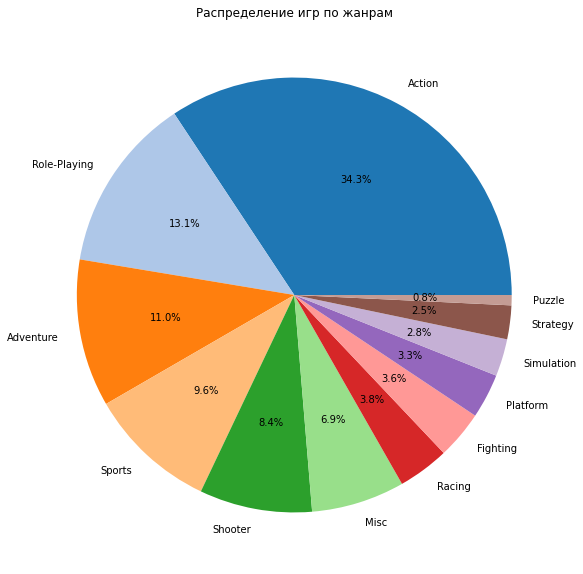

In [47]:
colors = sns.color_palette('tab20')
genre_data.sort_values(by='count', ascending=False).plot(
    kind='pie', y='count', colors = colors, 
    autopct='%.1f%%', figsize=(10, 10), legend=False
)
plt.title("Распределение игр по жанрам")
plt.ylabel('')
plt.show()

Наиболее популярный жанр — `Action`. При этом это очень широкий жанр.  
Наибольшее соотношение выпущенных игр к объёму продаж у `Shooter`, `Platform`, `Sports`.  
Наименее популярные — `Strategy`, `Puzzle`.  

#### Сравнение медианных продаж

In [48]:
median_genre_data = games_2013.pivot_table(index='genre', values='world_sales', aggfunc='median')
median_genre_data.columns = ['median']
median_genre_data.sort_values(by='median', ascending=False)

,median
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


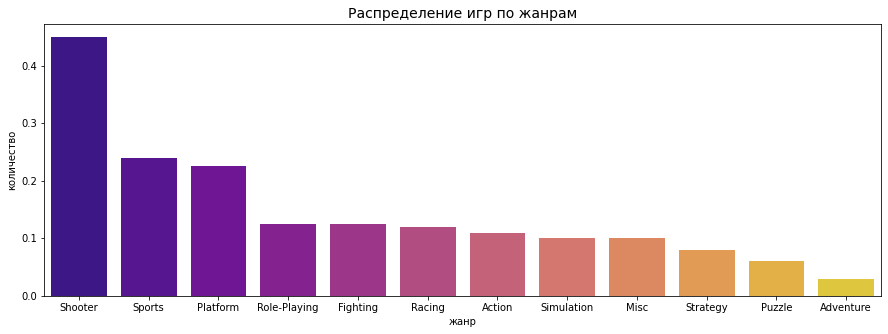

In [49]:
plt.figure(figsize=(15, 5))
median_genre_data = median_genre_data.sort_values(by='median', ascending=False)
fig = sns.barplot(x=median_genre_data.index, y='median', data=median_genre_data, palette='plasma')
fig.set_title('Распределение игр по жанрам', fontsize=14)
fig.set_xlabel('жанр')
fig.set_ylabel('количество')
plt.show()

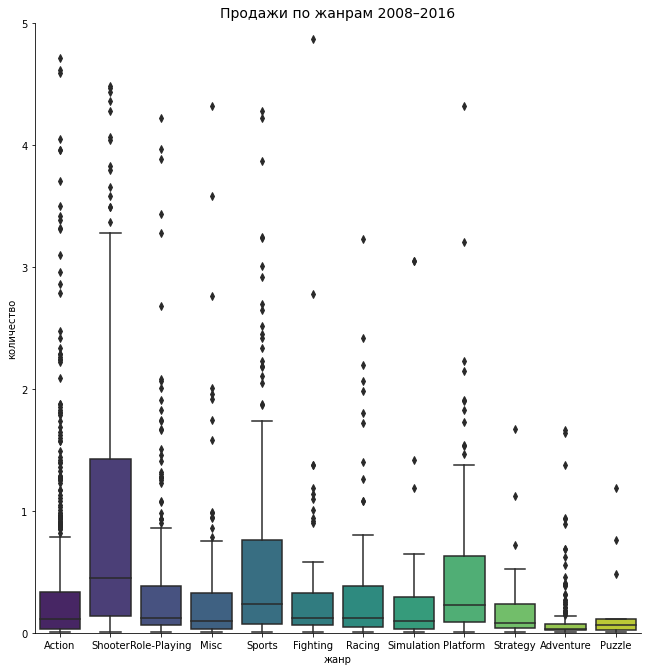

In [50]:
games_2013 = current_games.query('year_of_release > 2012')
sns.catplot(x="genre", y="world_sales", kind="box", data=games_2013, palette='viridis', height=9)
plt.title('Продажи по жанрам 2008–2016', fontsize=14)
plt.xlabel('жанр')
plt.ylabel('количество')
plt.ylim(0, 5)
plt.show()

***
### Вывод

* 8 лет — характерный срок, за который появляются новые и исчезают старые платформы.
* Начиная с 2010 года года продажи снизились практически вдвое.
* Данными до 1995 года можно пренебречь для планирования будущих продаж.
* Самые прибыльные платформы — консоли последнего поколения на время исследования: `PS4` и `XOne`.  
    Их продажи уже начали снижаться, никакой другой платформы, чьи продажи бы росли, нет.
* Для прогноза рекламной компании имеет смысл взять период для исследования начиная с 2013 года.  
    Это даты выхода платформ `PS4` и `XOne`.
* В целом продажи не превышают миллиона копий.
* В среднем оценки пользователей не влияют на количество продаж.
* В среднем оценки критиков влияют на количество продаж.
* Наиболее популярный жанр — `Action`.  
    Но количество игр в этом жанре не так велико.
* Наиболее популярный жанр со стабильными продажами — `Shooter`.
* Наименее популярные жанры — `Strategy`, `Puzzle`.<br><br>
***

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [51]:
na_sales = games_2013.pivot_table(
    index='platform', values='na_sales', aggfunc='sum'
).nlargest(5, 'na_sales').reset_index()
eu_sales = games_2013.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum'
).nlargest(5, 'eu_sales').reset_index()
jp_sales = games_2013.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum'
).nlargest(5, 'jp_sales').reset_index()
platforms = set(list(na_sales['platform']) + list(eu_sales['platform']) + list(jp_sales['platform']))

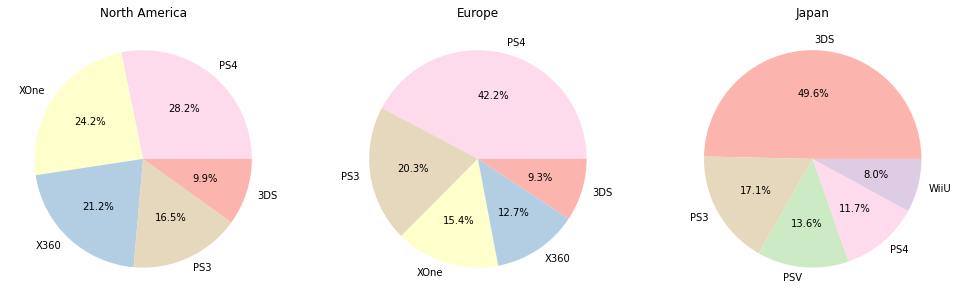

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

cm = plt.get_cmap('Pastel1')
c = [cm(1.0 * i/len(platforms)) for i in range(len(platforms))]
color_list = {i:j for i, j in zip(platforms, c)}

na_colors = [color_list[v] for v in list(na_sales.sort_values(by='na_sales', ascending=False)['platform'])]
na_sales.plot(
    kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', legend=False, ax=axes[0], labels=na_sales['platform']).set(ylabel='')

eu_colors = [color_list[v] for v in list(eu_sales.sort_values(by='eu_sales', ascending=False)['platform'])]
eu_sales.plot(
    kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_sales['platform']).set(ylabel='')

jp_colors = [color_list[v] for v in list(jp_sales.sort_values(by='jp_sales', ascending=False)['platform'])]
jp_sales.plot(
    kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_sales['platform']).set(ylabel='')

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show()

Для данного среза использовались данные с 2013 года.<br>
* Наиболее популярная платформа по всему миру — серия `Sony PlayStation`, в частности `PS4`.
* В регионе `North America` немного более распространена серия `Xbox`.
* В регионе `Europe` доминирует `PS4` и `PS3`.
* В регионе `Japan` 2/3 объёма продаж занимают «карманные» консоли, в частности `3DS`.
* Ни в одном регионе в данный период платформа персональных копьютеров `PC` не попала в пятёрку по объёму продаж.

### Самые популярные жанры (топ-5)

In [53]:
pd.set_option('mode.chained_assignment', None)
all_na_genres = games_2013.pivot_table(
    index='genre', values='na_sales', aggfunc='sum'
).sort_values(by='na_sales', ascending=False).reset_index()
na_genres = all_na_genres[:5]
na_genres.loc[5] = ['other', all_na_genres.loc[5:, 'na_sales'].sum()]
na_genres = na_genres.sort_values(by='na_sales', ascending=False).reset_index(drop=True)

all_eu_genres = games_2013.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum'
).sort_values(by='eu_sales', ascending=False).reset_index()
eu_genres = all_eu_genres[:5]
eu_genres.loc[5] = ['other', all_eu_genres.loc[5:, 'eu_sales'].sum()]
eu_genres = eu_genres.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)

all_jp_genres = games_2013.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum'
).sort_values(by='jp_sales', ascending=False).reset_index()
jp_genres = all_jp_genres[:5]
jp_genres.loc[5] = ['other', all_jp_genres.loc[5:, 'jp_sales'].sum()]
jp_genres = jp_genres.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)

genres = set(list(na_genres['genre']) + list(eu_genres['genre']) + list(jp_genres['genre']))
pd.set_option('mode.chained_assignment','warn')

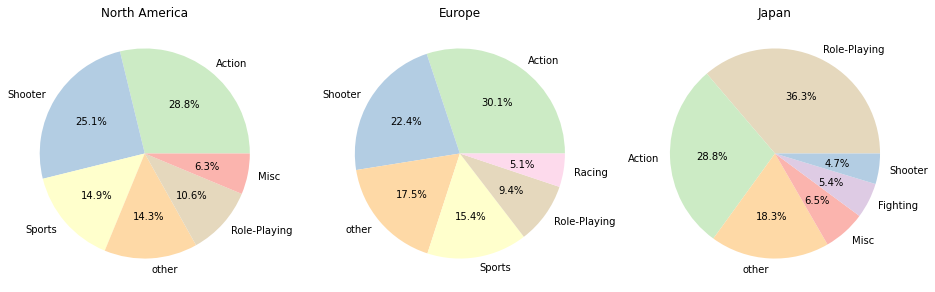

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

cm = plt.get_cmap('Pastel1')
c = [cm(1.0 * i/len(genres)) for i in range(len(genres))]
color_list_genres = {i:j for i, j in zip(genres, c)}

na_colors = [color_list_genres[v] for v in list(na_genres.sort_values(by='na_sales', ascending=False)['genre'])]
na_genres.plot(
    kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', legend=False, ax=axes[0], labels=na_genres['genre']).set(ylabel='')

eu_colors = [color_list_genres[v] for v in list(eu_genres.sort_values(by='eu_sales', ascending=False)['genre'])]
eu_genres.plot(
    kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_genres['genre']).set(ylabel='')

jp_colors = [color_list_genres[v] for v in list(jp_genres.sort_values(by='jp_sales', ascending=False)['genre'])]
jp_genres.plot(
    kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_genres['genre']).set(ylabel='')

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show()

Для данного среза использовались данные с 2013 года.<br>
* Жанр `Action` наиболее популярен в мире, распределение по регионам подтверждает предыдущие показатели.
* Регионы `North America` и `Europe` практически идентичны по жанрам и их распределению.
* Регион `Japan` отличается, превалирует жанр `Role-Playing`, распределение не похоже на `North America` и `Europe`.<br>
    Жанр `Action` также занимает большую часть.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [55]:
na_rating = games_2013.pivot_table(
    index='rating', values='na_sales', aggfunc='sum'
).nlargest(5, 'na_sales').reset_index()
eu_rating = games_2013.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum'
).nlargest(5, 'eu_sales').reset_index()
jp_rating = games_2013.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum'
).nlargest(5, 'jp_sales').reset_index()
ratings = set(list(na_rating['rating']) + list(eu_rating['rating']) + list(jp_rating['rating']))

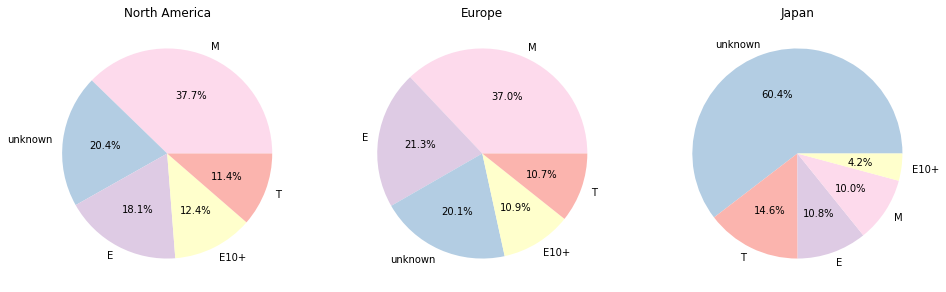

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

cm = plt.get_cmap('Pastel1')
c = [cm(1.0 * i/len(ratings)) for i in range(len(ratings))]
color_list_ratings = {i:j for i, j in zip(ratings, c)}

na_colors = [color_list_ratings[v] for v in list(na_rating.sort_values(by='na_sales', ascending=False)['rating'])]
na_rating.plot(
    kind='pie', y='na_sales', colors = na_colors, 
    autopct='%.1f%%', legend=False, ax=axes[0], labels=na_rating['rating']).set(ylabel='')

eu_colors = [color_list_ratings[v] for v in list(eu_rating.sort_values(by='eu_sales', ascending=False)['rating'])]
eu_rating.plot(
    kind='pie', y='eu_sales', colors = eu_colors, 
    autopct='%.1f%%', legend=False, ax=axes[1], labels=eu_rating['rating']).set(ylabel='')

jp_colors = [color_list_ratings[v] for v in list(jp_rating.sort_values(by='jp_sales', ascending=False)['rating'])]
jp_rating.plot(
    kind='pie', y='jp_sales', colors = jp_colors, 
    autopct='%.1f%%', legend=False, ax=axes[2], labels=jp_rating['rating']).set(ylabel='')

axes[0].set_title('North America')
axes[1].set_title('Europe')
axes[2].set_title('Japan')
plt.show()

* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.  
    Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.  
    Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults").
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».  
    Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.  
    Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
    
    https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Для данного среза использовались данные с 2013 года.
* В регионах `North America` и `Europe` преобладает рейтинг `M`, что соотносится с самыми популярными жанрами: `Action` и `Shooter`.
* В регионах `North America` и `Europe` наименее распространённый рейтинг — `T`.  
    Подростки, вероятно, тяготеют к играм взрослого рейтинга.
* Довольно много детских игр с рейтингом `E` и `E10+`. Дети всех возрастов любят видео-игры.
* В регионе `Japan` много контента без рейтинга.  
    ESRB — основанная в США и Канаде негосударственная организация.  
    В Японии есть собственная рейтинговая организация — CERO.  
    К тому же в Японии сильно развита собственная игровая индустрия, которая не распространяется за пределы страны.  
    Видимо, рейтинг ESRB в данном регионе не так востребован.  

***
### Вывод

* Наиболее популярная платформа по всему миру — серия `Sony PlayStation`, в частности `PS4`.
* В регионе `Japan` 2/3 объёма продаж занимают «карманные» консоли, в частности `3DS`.
* Жанр Action наиболее популярен в мире.
* Регионы `North America` и `Europe` практически идентичны по жанрам и их распределению.
* Регион `Japan` отличается, превалирует жанр `Role-Playing`.
* В регионах `North America` и `Europe` преобладает рейтинг `M`, что соотносится с самыми популярными жанрами: `Action` и `Shooter`.
* Рейтинг `ESRB` в регионе `Japan` не так востребован.<br><br>
***

## Проверка гипотез

### Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

* Нулевая гипотеза $ H_{0} $:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Альтернативная гипотеза $ H_{1} $:  
Средние пользовательские рейтинги платформ Xbox One и PC различаются

Критический уровень статистической значимости принимаю равным 5%.  
Для проверки гипотезы будут использоваться данные с 2013 года.

In [57]:
xone = games_2013.query('(platform == "XOne") & (user_score != -1)')['user_score']
pc = games_2013.query('(platform == "PC") & (user_score != -1)')['user_score']

In [59]:
alpha = .05
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-значение: {:%}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Средние пользовательские рейтинги платформ Xbox One и PC различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-значение: 14.759594%
Не получилось отвергнуть нулевую гипотезу.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [60]:
games_2013.query('user_score != -1').pivot_table(
    index='platform', values='user_score', aggfunc='mean'
).sort_values(by='user_score', ascending=False)

,user_score
platform,
PSV,7.527273
WiiU,7.017500
3DS,6.976250
PS4,6.748249
XOne,6.521429
PS3,6.348387
PC,6.269677
X360,5.993007
PSP,5.850000


### Средние пользовательские рейтинги жанров `Action` и `Sports` разные

* Нулевая гипотеза $ H_{0} $:  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

* Альтернативная гипотеза $ H_{1} $:  
Средние пользовательские рейтинги жанров Action и Sports разные

Критический уровень статистической значимости принимаю равным 5%.  
Для проверки гипотезы будут использоваться данные с 2013 года.

In [61]:
action = games_2013.query('(genre == "Action") & (user_score != -1)')['user_score']
sports = games_2013.query('(genre == "Sports") & (user_score != -1)')['user_score']

In [63]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение: {:%}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые")

p-значение: 0.000000%
Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги жанров Action и Sports разные


In [64]:
games_2013.query('user_score != -1').pivot_table(
    index='genre', values='user_score', aggfunc='mean'
).sort_values(by='user_score', ascending=False)

,user_score
genre,
Puzzle,7.471429
Adventure,7.461667
Role-Playing,7.376471
Fighting,7.037500
Misc,6.975000
Action,6.837532
Platform,6.713793
Shooter,6.342308
Strategy,6.183333


## Общий вывод

Планирование рекламной компании на 2017 год.

* Самые популярные платформы — `PS4` и `XOne`.
* Не выявлено другой платформы, которая набирает популярность.
* Самые популярные жанры в регионах `North America` и `Europe` — `Shooter`, `Action`.  
    Наиболее популярны игры с рейтингом `M` («для взрослых»).  
    Жанр `Shooter` более стабилен в продажах.  
* Самый популярный жанр в регионе `Japan` — `Role-Playing`.  
    Для оценки влияния рейтинга стоит рассмотреть данные местной рейтинговой системы.  
* Для наибольшего охвата аудитории имеет смысл обратить внимание на детские игры (рейтинги `E10+`, `E`).  
    Игры с подростковым рейтингом наименее популярны.  
* Оценки пользователей не влияют на продажи.
* Оценки критиков влияют на продажи.